Obdelava podatkov
Gradnja modelov
Evaluacija reg modelov
Evaluacija modela: Bagging
Zaključena evaluacija modela: Bagging
Evaluacija modela: Random Forest
Zaključena evaluacija modela: Random Forest
Evaluacija modela: AdaBoost
Zaključena evaluacija modela: AdaBoost
Evaluacija modela: Gradient Boosting
Zaključena evaluacija modela: Gradient Boosting
Evaluacija modela: MLP Regressor
Zaključena evaluacija modela: MLP Regressor
Evaluacija class modelov
Evaluacija modela: Bagging
Zaključena evaluacija modela: Bagging
Evaluacija modela: Random Forest
Zaključena evaluacija modela: Random Forest
Evaluacija modela: AdaBoost
Zaključena evaluacija modela: AdaBoost
Evaluacija modela: Gradient Boosting
Zaključena evaluacija modela: Gradient Boosting
Evaluacija modela: MLP Classifier
Zaključena evaluacija modela: MLP Classifier
Rezultati za Bagging (Regression Problem):
	test_neg_mean_squared_error: 0.050
	test_neg_mean_absolute_error: 0.146
	test_r2: 0.950


Rezultati za Random Forest (Regression P

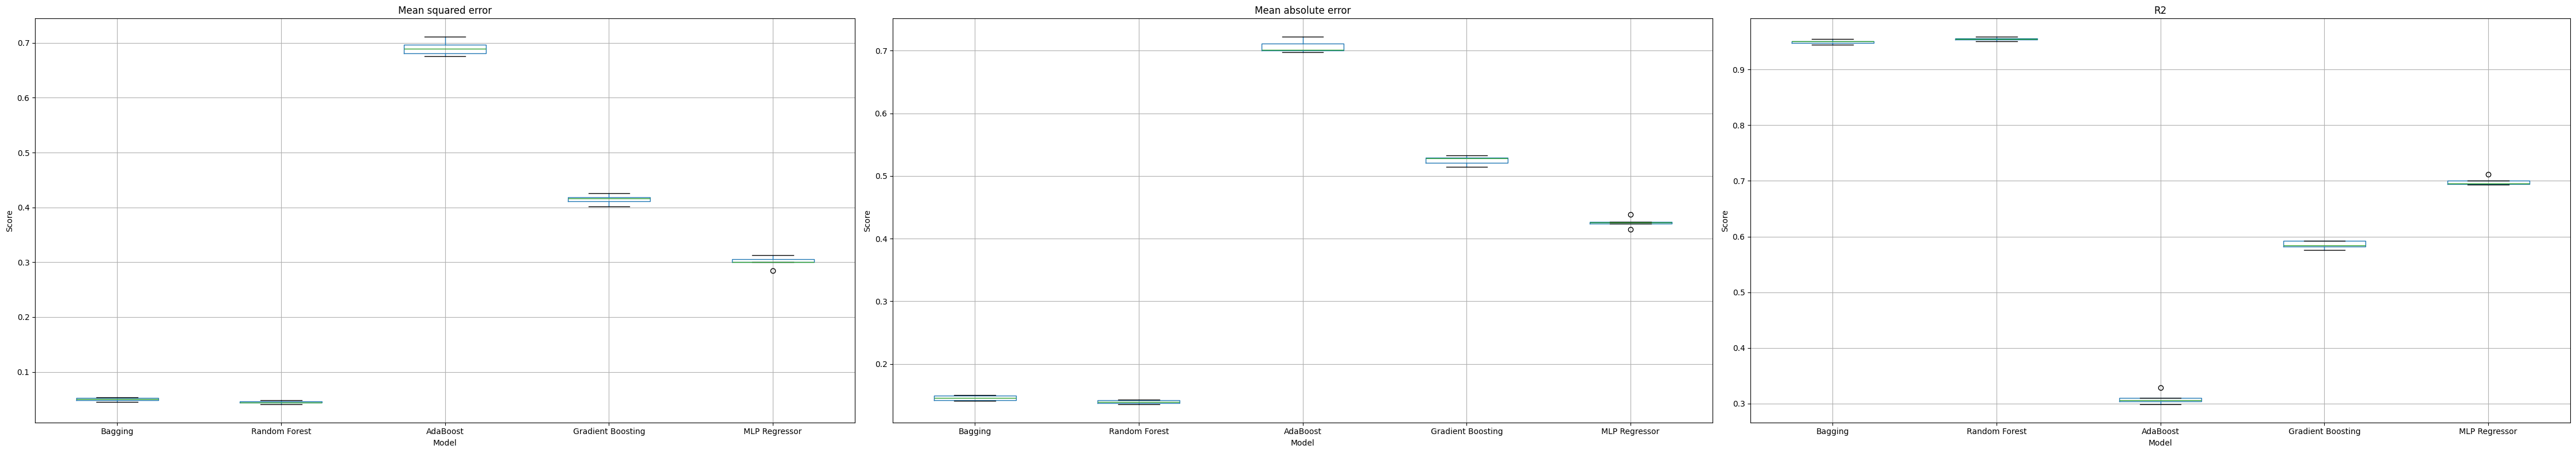

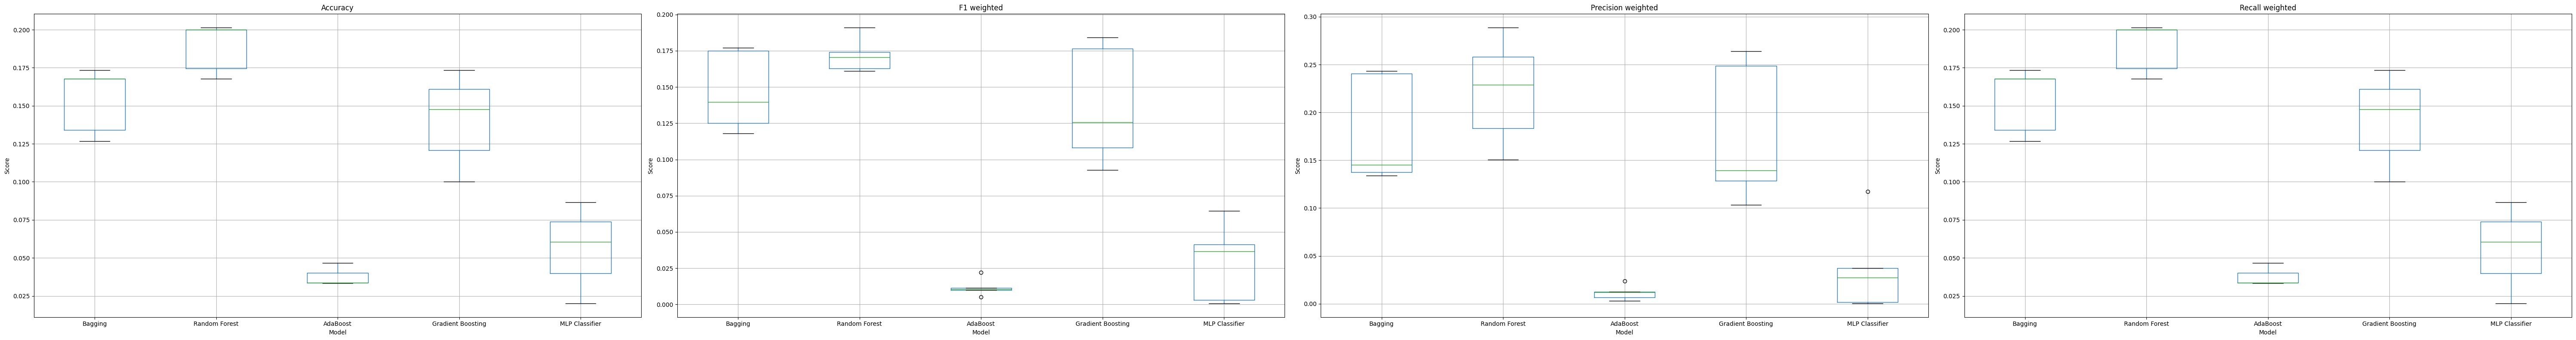

C:\Users\mitja\AppData\Local\Temp\ipykernel_14052\2691027952.py:267: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax1.legend([ax1.get_legend(), ax2.get_legend(), ax3.get_legend()], labels=['Mean Squared Error', 'Mean Absolute Error', 'R2 Score'], loc='upper right')


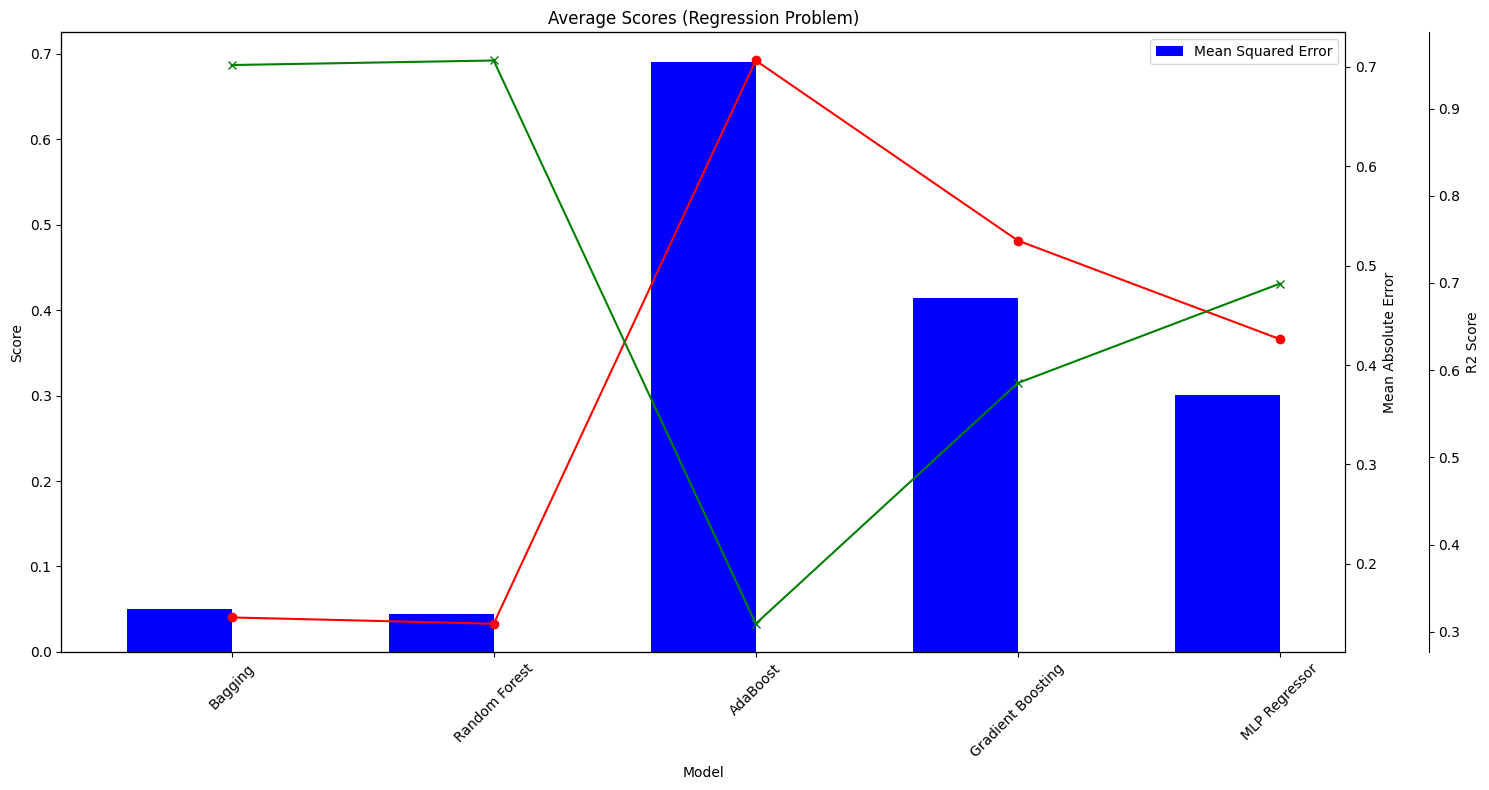

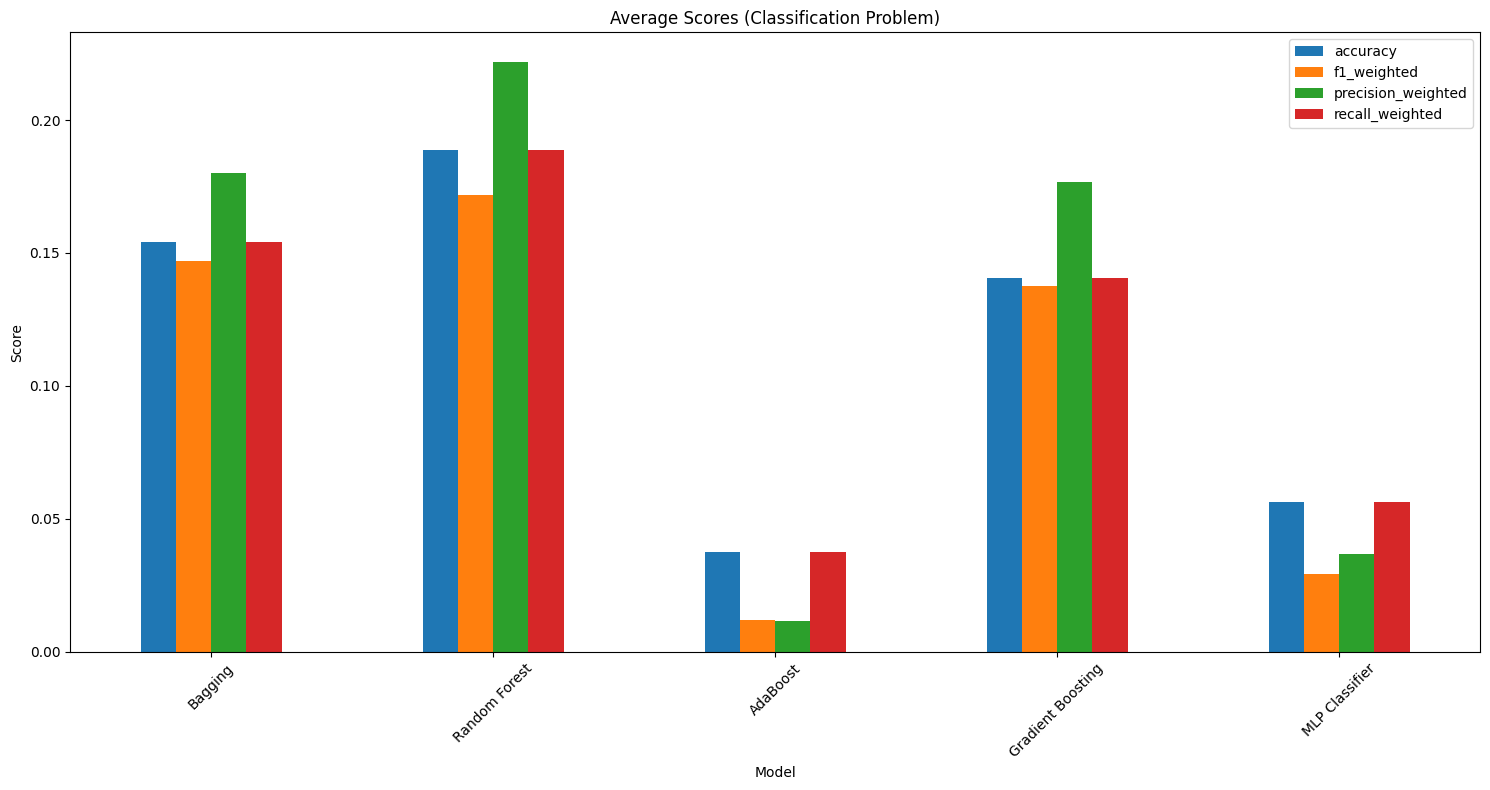

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.feature_selection import mutual_info_regression
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from PIL import Image
import os



def load_and_preprocess_classification_data():
    data_dir = 'C:/Users/mitja/Desktop/agriculture-crops'
    categories = [
        "almond",
        "banana",
        "cardamom",
        "cherry",
        "chilli",
        "clove",
        "coconut",
        "coffee_plant",
        "cotton",
        "cucumber",
        "fox_nut-makhana",
        "gram",
        "jowar",
        "jute",
        "lemon",
        "maize",
        "mustard_oil",
        "olive_tree",
        "papaya",
        "pearl_millet-bajra",
        "pineapple",
        "rice",
        "soyabean",
        "sugarcane",
        "sunflower",
        "tea",
        "tobacco_plant",
        "tomato",
        "vigna_radiati-mung",
        "wheat"]
    paths = []
    labels = []

    for i, category in enumerate(categories):
        category_dir = os.path.join(data_dir, category)
        for filename in os.listdir(category_dir):
            if filename == '.DS_Store':
                continue  # Preskoči datoteko .DS_Store
            file_path = os.path.join(category_dir, filename)
            paths.append(file_path)
            labels.append(i)

    images = []
    for path in paths:
        img = Image.open(path).convert('L')
        img = img.resize((128, 128))
        img_array = np.array(img).flatten()
        images.append(img_array)

    X = np.array(images)
    y = np.array(labels)

    X = X / 255.0

    return X, y

def load_and_preprocess_regression_data():
    data = pd.read_csv('C:/Users/mitja/Desktop/mbajk_dataset.csv', parse_dates=['date'])

    data['day'] = data['date'].dt.day
    data['month'] = data['date'].dt.month
    data['year'] = data['date'].dt.year
    data['hour'] = data['date'].dt.hour
    data.drop('date', axis=1, inplace=True)

    imputer = SimpleImputer(strategy='mean')
    numerical_columns = data.select_dtypes(include=[np.number]).columns
    data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

    # Linearna regresija
    for column in numerical_columns:
        if data[column].isnull().any():
            reg = LinearRegression()
            not_null_data = data.dropna(subset=[column])
            null_data = data[data[column].isnull()]
            reg.fit(not_null_data.drop(column, axis=1), not_null_data[column])
            data.loc[data[column].isnull(), column] = reg.predict(null_data.drop(column, axis=1))

    
    

    scaler = MinMaxScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    scaler = StandardScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

    # Izbor značilnosti
    target_column = 'available_bike_stands'  # Uporabite 'available_bike_stands' kot ciljno spremenljivko
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, index=X.columns)
    selected_features = mi_scores[mi_scores > 0.1].index.tolist()

    return data[selected_features], y

  


def transform_features(data):
    pt = PowerTransformer()
    numerical_features = data.select_dtypes(include=[np.number]).columns
    data[numerical_features] = pt.fit_transform(data[numerical_features])
    return data


def standardize_features(data):
    scaler = StandardScaler()
    numerical_features = data.select_dtypes(include=[np.number]).columns
    data[numerical_features] = scaler.fit_transform(data[numerical_features])
    return data


def create_new_features(data):
    data['day'] = data.index.day
    data['month'] = data.index.month
    data['hour'] = data.index.hour
    return data

def select_features(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    selected_features = mi_scores[mi_scores > 0.1].index  # Prag je nastavljen na 0.1, prilagodite po potrebi
    return selected_features


def build_neural_network_regressor():
    model = MLPRegressor(random_state=1234)
    return model

def build_neural_network_classifier():
    model = MLPClassifier(random_state=1234)
    return model


def build_regressor_models():
    models = {
        "Bagging": BaggingRegressor(random_state=1234, n_jobs=-1),
        "Random Forest": RandomForestRegressor(random_state=1234, n_jobs=-1),
        "AdaBoost": AdaBoostRegressor(random_state=1234),
        "Gradient Boosting": GradientBoostingRegressor(random_state=1234),
        "MLP Regressor": MLPRegressor(random_state=1234)  
    }
    return models

def build_classifier_models():
    models = {
        "Bagging": BaggingClassifier(random_state=1234, n_jobs=-1),
        "Random Forest": RandomForestClassifier(random_state=1234, n_jobs=-1),
        "AdaBoost": AdaBoostClassifier(random_state=1234),
        "Gradient Boosting": GradientBoostingClassifier(random_state=1234),
        "MLP Classifier": MLPClassifier(random_state=1234)  
    }
    return models





def evaluate_models(models, X, y, problem_type="regression"):
    kf = KFold(n_splits=5, shuffle=True, random_state=1234)
    results = {}

    for name, model in models.items():
        print(f"Evaluacija modela: {name}") 
        if problem_type == "regression":
            metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']
        else:
            metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
        
        cv_results = cross_validate(model, X, y, cv=kf, scoring=metrics, n_jobs=-1)
        results[name] = cv_results
        print(f"Zaključena evaluacija modela: {name}") 

    return results










            



def plot_separate_scores(results, problem_type="regression"):
    metrics = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'] if problem_type == "regression" else ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
    num_metrics = len(metrics)
    fig, axes = plt.subplots(1, num_metrics, figsize=(15 * num_metrics, 8))  

    if not isinstance(axes, np.ndarray):
        axes = [axes]

    for ax, metric in zip(axes, metrics):
        data = []
        for model_name, scores in results.items():
            if f'test_{metric}' in scores:
                score_values = -np.array(scores[f'test_{metric}']) if 'neg_' in metric else scores[f'test_{metric}']
                data.append(pd.Series(score_values, name=model_name))
        
        combined_data = pd.concat(data, axis=1)
        combined_data.boxplot(ax=ax)
        ax.set_title(metric.replace('neg_', '').replace('test_', '').replace('_', ' ').capitalize())
        ax.set_xlabel('Model')
        ax.set_ylabel('Score')

    plt.tight_layout()
    plt.show()


def plot_average_scores(results, problem_type="regression"):
    avg_scores = {}
    for name, scores in results.items():
        avg_scores[name] = {metric: np.mean(values) if 'neg_' not in metric else -np.mean(values) for metric, values in scores.items() if 'time' not in metric}

    df_avg_scores = pd.DataFrame(avg_scores).T
    df_avg_scores.columns = [col.replace('test_', '').replace('neg_', '') for col in df_avg_scores.columns]

    fig, ax1 = plt.subplots(figsize=(15, 8))  

    if problem_type == "regression":
        df_avg_scores['mean_squared_error'].plot(kind='bar', color='blue', ax=ax1, width=0.4, position=1)
        ax2 = ax1.twinx()
        df_avg_scores['mean_absolute_error'].plot(kind='line', marker='o', color='red', ax=ax2)
        ax3 = ax1.twinx()
        ax3.spines['right'].set_position(('outward', 60))
        df_avg_scores['r2'].plot(kind='line', marker='x', color='green', ax=ax3)

        ax1.set_ylabel('Mean Squared Error')
        ax2.set_ylabel('Mean Absolute Error')
        ax3.set_ylabel('R2 Score')

        ax1.legend([ax1.get_legend(), ax2.get_legend(), ax3.get_legend()], labels=['Mean Squared Error', 'Mean Absolute Error', 'R2 Score'], loc='upper right')
    else:
        df_avg_scores[['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']].plot(kind='bar', ax=ax1)

    ax1.set_title(f'Average Scores ({problem_type.capitalize()} Problem)')
    ax1.set_xlabel('Model')
    ax1.set_xticklabels(df_avg_scores.index, rotation=45)
    ax1.set_ylabel('Score')

    plt.tight_layout()
    plt.show()




def print_model_results(results, problem_type="regression"):
    for model_name, model_scores in results.items():
        
        print(f"Rezultati za {model_name} ({problem_type.capitalize()} Problem):")
        for metric, scores in model_scores.items():
            if 'time' not in metric:
                avg_score = np.mean(scores)
                if avg_score > 0:
                    
                    print(f"\t{metric}: {avg_score:.3f}")
                else:
                    
                    print(f"\t{metric}: {avg_score*-1:.3f}")
                
        print("\n")
        
def main():
   
    print("Obdelava podatkov")
    X_reg, y_reg = load_and_preprocess_regression_data()
    

    classification_data = load_and_preprocess_classification_data()
    X_cls, y_cls = classification_data

 
    print("Gradnja modelov")
    regressor_models = build_regressor_models()
    classifier_models = build_classifier_models()

  
    print("Evaluacija reg modelov")
    regression_results = evaluate_models(regressor_models, X_reg, y_reg, problem_type="regression")
    print("Evaluacija class modelov")
    classification_results = evaluate_models(classifier_models, X_cls, y_cls, problem_type="classification")

   
    print_model_results(regression_results, problem_type="regression")
    print_model_results(classification_results, problem_type="classification")
    print("/////////////////////////////////")


    # Vizualizacija metrik
    plot_separate_scores(regression_results, problem_type="regression")
    plot_separate_scores(classification_results, problem_type="classification")

    # Vizualizacija povprečnih vrednosti metrik
    plot_average_scores(regression_results, problem_type="regression")
    plot_average_scores(classification_results, problem_type="classification")
    
if __name__ == "__main__":
    main()
